# IMPORT

In [43]:
import pandas                               as pd
import matplotlib.pyplot                    as plt
import seaborn                              as sns
import numpy                                as np
import statsmodels.api                      as sm
import warnings

from matplotlib                             import colors
from factor_analyzer                        import FactorAnalyzer
from factor_analyzer.factor_analyzer        import calculate_bartlett_sphericity
from sklearn.preprocessing                  import StandardScaler
from sklearn.cluster                        import KMeans
from sklearn.metrics                        import silhouette_score

warnings.filterwarnings('ignore')

# LOADING DATASET

In [2]:
df = pd.read_csv('Datasets/housing.csv')

# ANÁLISE EXPLORATÓRIA

#### Amostra dos dados

In [3]:
df.sample(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
7462,-118.18,33.93,35.0,952.0,271.0,949.0,261.0,2.4297,147200.0,<1H OCEAN
5893,-118.31,34.16,38.0,2347.0,665.0,1317.0,547.0,3.2112,349300.0,<1H OCEAN
8258,-118.18,33.77,29.0,1776.0,606.0,1391.0,488.0,1.1295,137500.0,NEAR OCEAN
5078,-118.29,33.98,48.0,1124.0,231.0,783.0,223.0,3.4444,93100.0,<1H OCEAN
13563,-117.28,34.15,38.0,1981.0,343.0,796.0,344.0,3.8125,97400.0,INLAND
13892,-116.27,34.13,37.0,452.0,109.0,184.0,59.0,3.7292,65800.0,INLAND
6043,-117.74,34.05,29.0,2452.0,700.0,3029.0,665.0,2.1354,110700.0,INLAND
4638,-118.29,34.06,46.0,1759.0,1012.0,2716.0,877.0,2.1637,350000.0,<1H OCEAN
16243,-121.30,37.98,39.0,3375.0,659.0,1388.0,631.0,2.6364,93800.0,INLAND
712,-122.08,37.67,29.0,493.0,168.0,233.0,152.0,0.9637,160000.0,NEAR BAY


#### Tipos de dados

In [4]:
print(df.dtypes)

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object


#### Verificando a existência de valores Nulos

In [5]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

#### Preenchendo valores nulos

In [6]:
df['total_bedrooms'] = df['total_bedrooms'].apply(lambda x: np.mean(df['total_bedrooms']) if pd.isnull(x) else x)

In [7]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

#### Descrição dos dados

In [8]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,419.266592,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,438.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


#### Matriz de correlação

<AxesSubplot:>

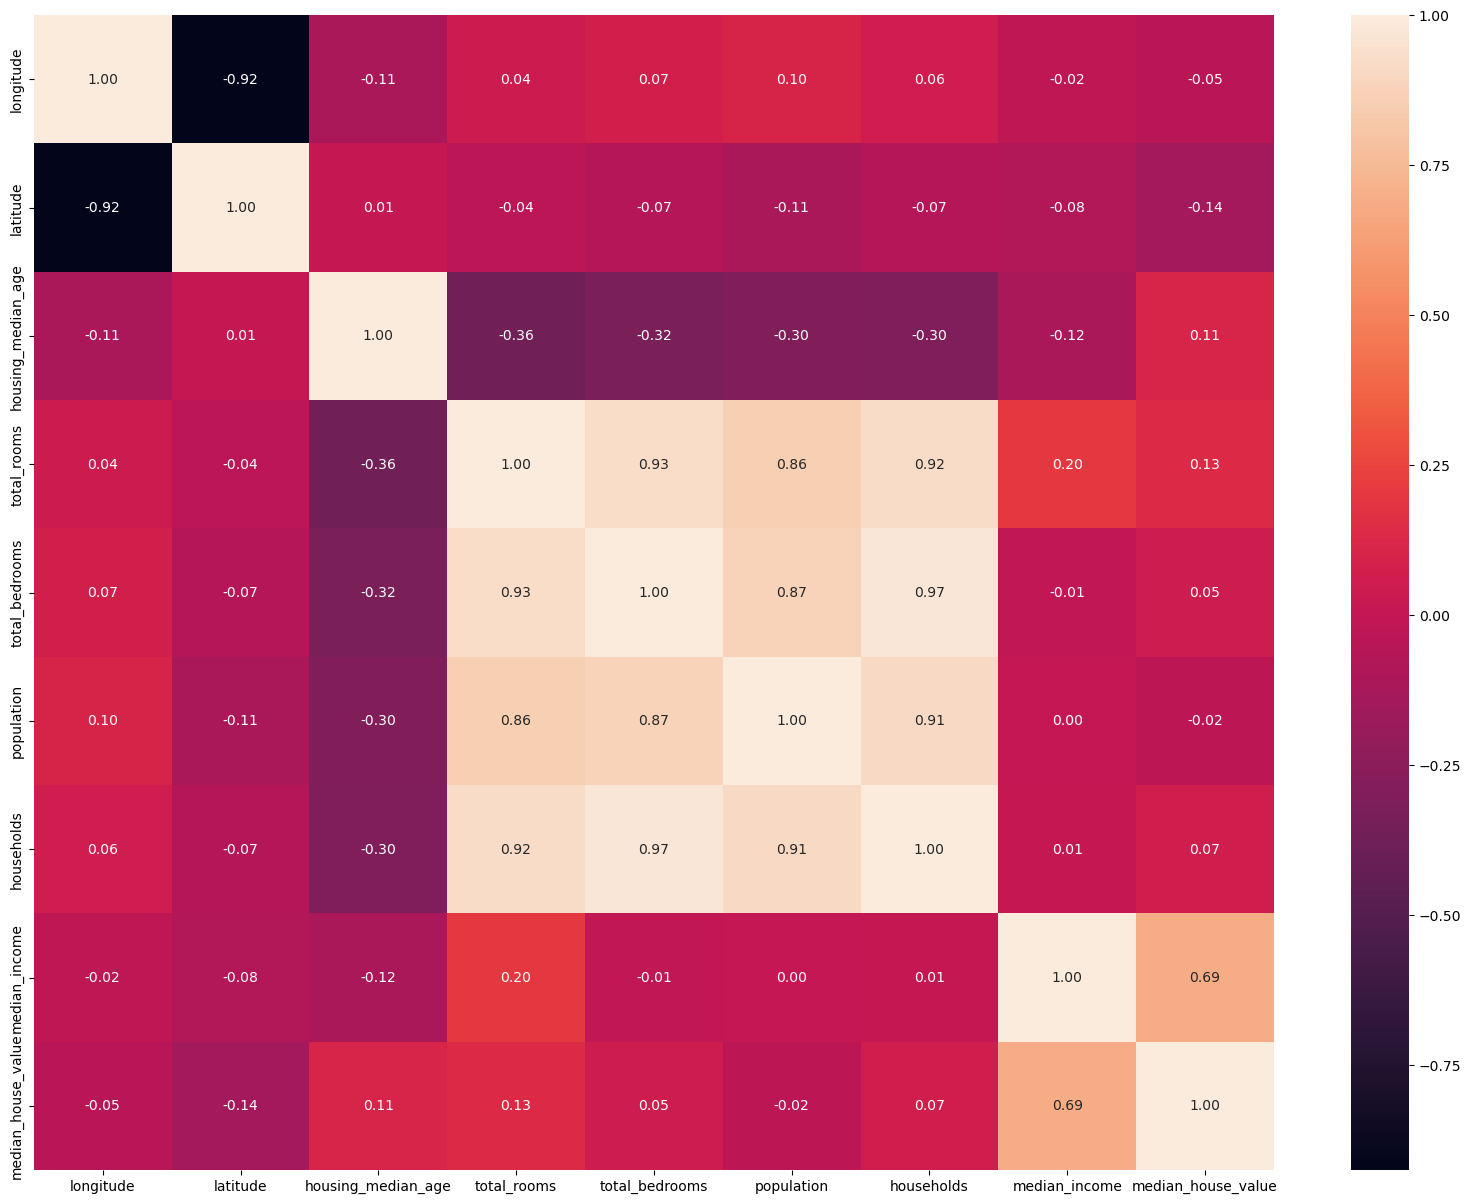

In [9]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True, fmt='.2f')

#### Dispersão dos dados

Reletive Plot Of Some Selected Features: A Data Subset


<Figure size 3000x2000 with 0 Axes>

<Figure size 640x480 with 0 Axes>

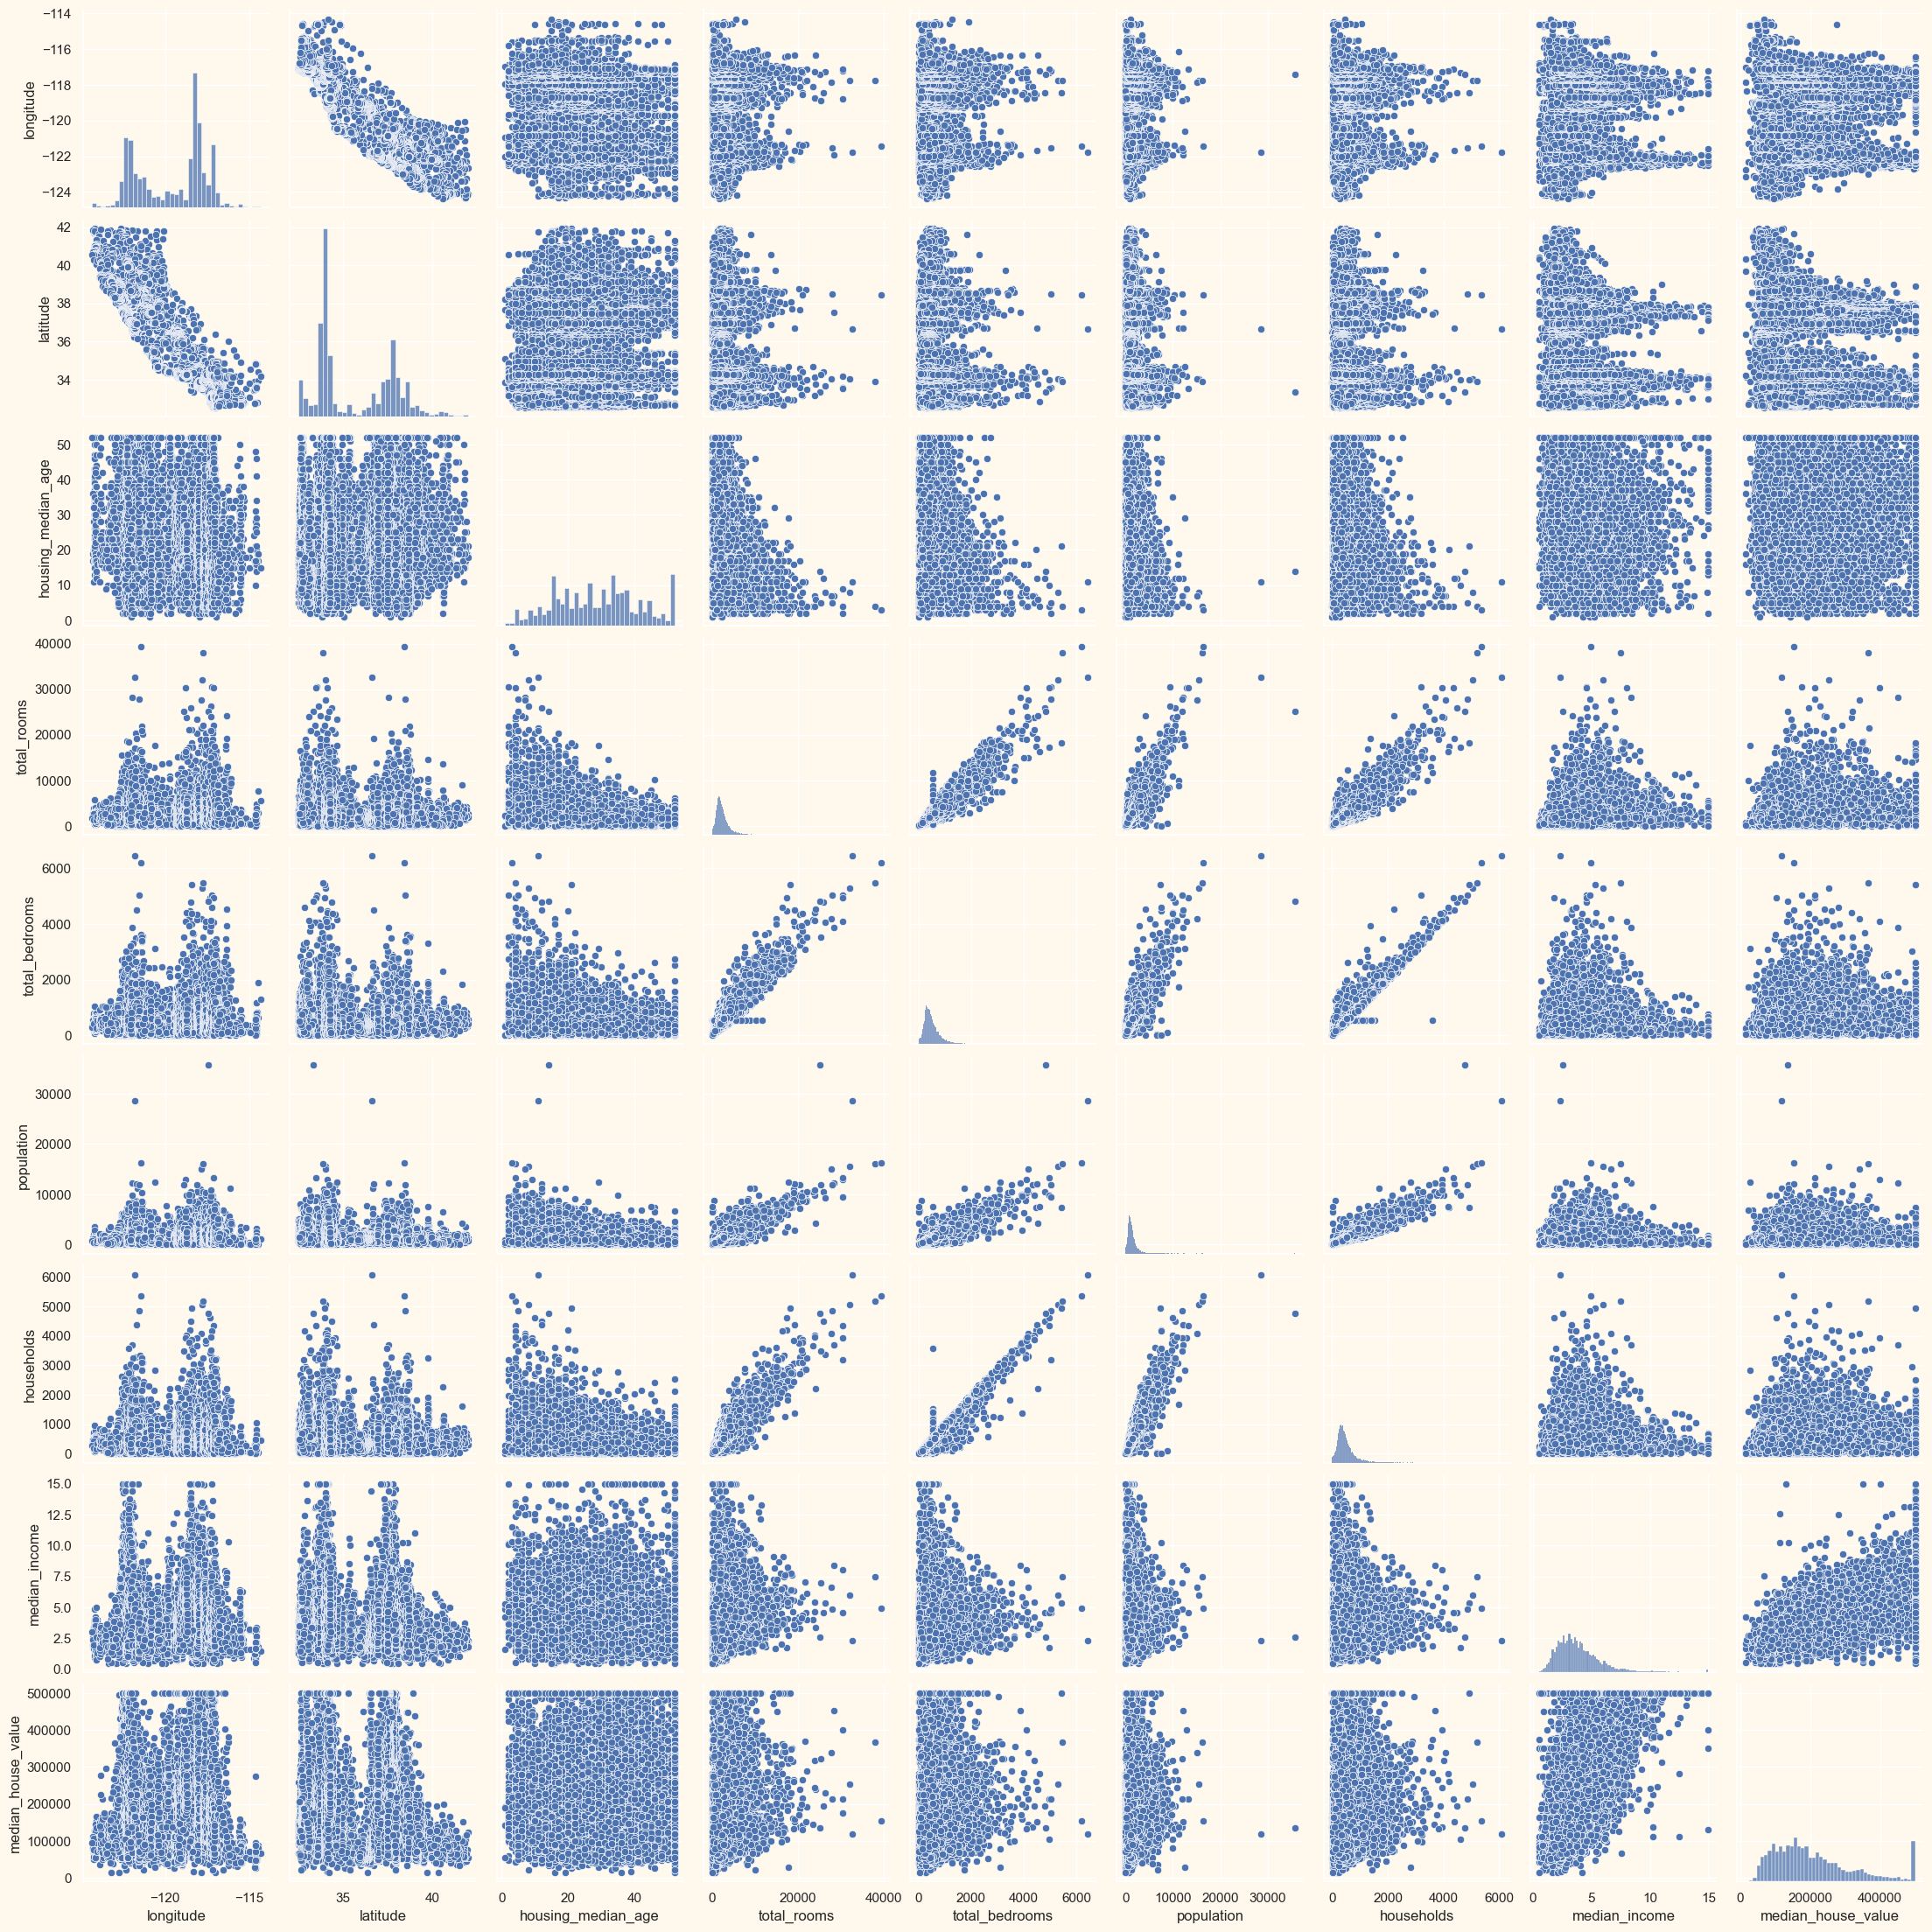

In [10]:
plt.figure(figsize=(30,20))

#Setting up colors prefrences
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
pallet = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])
#Plotting following features
To_Plot = df.columns
print("Reletive Plot Of Some Selected Features: A Data Subset")
plt.figure()
sns.pairplot(df[To_Plot],palette= (["#682F2F","#F3AB60"]))
#Taking hue 
plt.show()

#### Variável Categórica

In [11]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

#### Renomear Variáveis Categóricas

In [12]:
mapa = {'<1H OCEAN':'1_H_OCEAN',
        'INLAND':'INLAND',
        'NEAR OCEAN':'NEAR_OCEAN',
        'NEAR BAY':'NEAR_BAY',
        'ISLAND':'ISLAND'}

df['ocean_proximity'] = df['ocean_proximity'].map(mapa)

In [13]:
df['ocean_proximity'].value_counts()

1_H_OCEAN     9136
INLAND        6551
NEAR_OCEAN    2658
NEAR_BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

#### Boxplot Variáveis Categóricas

<AxesSubplot:ylabel='median_house_value'>

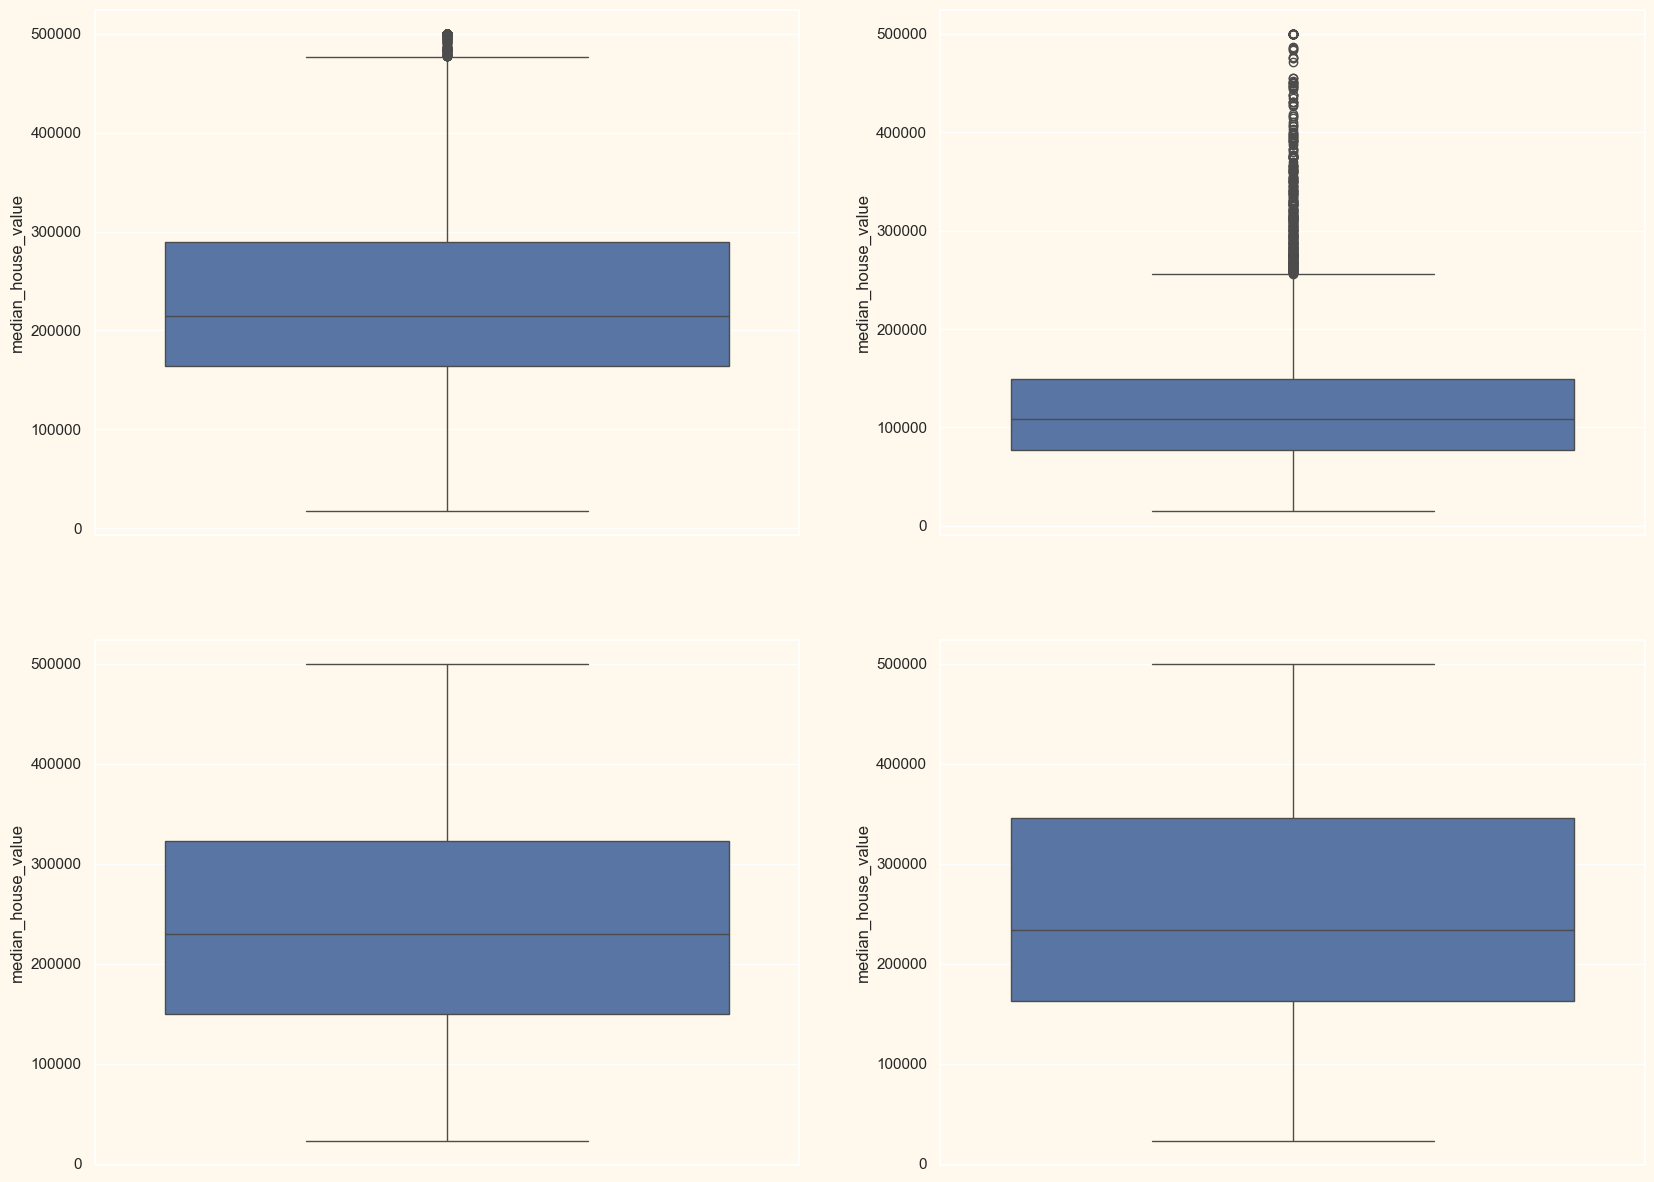

In [14]:
plt.figure(figsize=(20,15))

plt.subplot(2, 2, 1)
sns.boxplot(df[df['ocean_proximity'] == '1_H_OCEAN']['median_house_value'])

plt.subplot(2, 2, 2)
sns.boxplot(df[df['ocean_proximity'] == 'INLAND']['median_house_value'])

plt.subplot(2, 2, 3)
sns.boxplot(df[df['ocean_proximity'] == 'NEAR_OCEAN']['median_house_value'])

plt.subplot(2, 2, 4)
sns.boxplot(df[df['ocean_proximity'] == 'NEAR_BAY']['median_house_value'])

# ANÁLISE PCA

#### Duplicando o dataframe e removendo a variável alvo

In [15]:
# Variáveis categóricas continuam categóricas, não devemos incluí-las na PCA, por mais que virem dummies
df_pca = df.drop(['median_house_value', 'ocean_proximity'], axis=1)

#### Padronizando os dados

In [16]:
df_pca_std = StandardScaler().fit_transform(df_pca)
df_pca_std = pd.DataFrame(df_pca_std)
df_pca_std.columns = df_pca.columns

#### Teste de esfericidade de Barlett

In [17]:
#O teste de esfericidade de Barlett tem como objetivo verificar se há diferenças entre a matriz de correlação
#com sua matriz identidade, se houver diferença, significa que há variabilidade compartilhada entre os dados,
#dessa forma podemos prosseguir com a análise PCA. Em caso de não houver significância, a análise PCA não é indicada

qui_quadrado, p_value = calculate_bartlett_sphericity(df_pca_std)

#### Teste de hipóteses, p-value

In [18]:
#Hipótese nula ou H0, não há diferenças estatisticamente significantes entre a matriz de correlação 
# e sua matriz identidade
#Hipótese alternativa, há diferenças

if p_value < 0.05:
    print('p_valor: {}, rejeita-se a hipótese nula, há diferença'.format(round(p_value), 2))
elif p_value > 0.05:
    print('p_valor: {}, aceita-se a hipótese nula, não há diferença'.format(round(p_value), 2))

p_valor: 0, rejeita-se a hipótese nula, há diferença


#### Definindo a análise PCA

In [19]:
# Inicialmente devemos extrair todos os autovalores possíveis

fat = FactorAnalyzer(n_factors=8, method='principal', rotation=None).fit(df_pca_std)

#### Obtendo os autovalores (eigenvalues)

In [20]:
# A somatória dos autovalores é igual a quantidade de variáveis, pelo critério de Kayser (raíz latente), devemos
# escolher os autovalores maiores do que 1

autovalores = fat.get_eigenvalues()[0]
df_autovalores = pd.DataFrame(autovalores)
df_autovalores.columns = ['Autovalor']
df_autovalores['Autovalor'] = df_autovalores['Autovalor'].apply(lambda x: format(x, '.2f'))
print(df_autovalores)

  Autovalor
0      3.90
1      1.91
2      1.07
3      0.82
4      0.15
5      0.08
6      0.05
7      0.02


#### Critério de Kayser (Raíz Latente)

In [21]:
# Dentre os autovalores possíveis, devemos escolher os que possuem carga maio ou igual a 1, siginifica que o fator
# sozinho explica mais a variabilidade dos dados do que uma única variável original

fat = FactorAnalyzer(n_factors=3, method='principal', rotation=None).fit(df_pca_std)

#### Eigenvalues, variâncias e variâncias acumuladas

In [22]:
autovalores_fatores = fat.get_factor_variance()
tabela_eigen = pd.DataFrame(autovalores_fatores)
tabela_eigen.index = ['Autovalor', 'Variância', 'Variância Ac.']
tabela_eigen.columns = [f'Fator {i + 1}' for i, v in enumerate(tabela_eigen.columns)]
tabela_eigen = tabela_eigen.T
print(tabela_eigen)

         Autovalor  Variância  Variância Ac.
Fator 1   3.900855   0.487607       0.487607
Fator 2   1.907768   0.238471       0.726078
Fator 3   1.071840   0.133980       0.860058


#### Gráfico da variância dos componentes principais

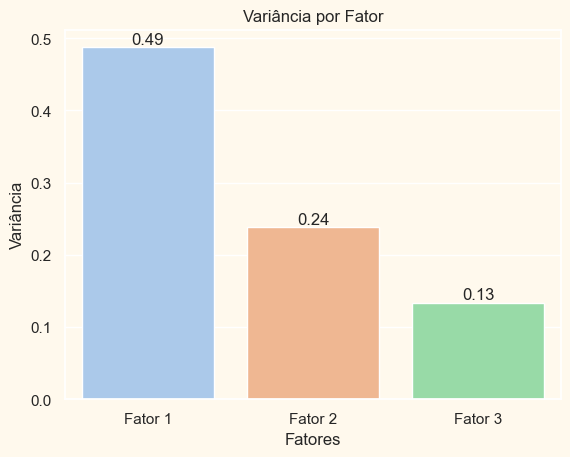

In [23]:
ax = sns.barplot(data=tabela_eigen, y=tabela_eigen['Variância'], x=tabela_eigen.index, palette='pastel')
plt.xlabel('Fatores')
plt.title ('Variância por Fator')
for barra in ax.containers:
    ax.bar_label(barra, fmt='%.2f', label_type='edge')

#### Determinando as cargas fatoriais

In [24]:
# As cargas fatoriais representam o quanto de variância os fatores conseguem capturar de cada feature
# é a correlação entre o fator e a variável original

cargas_fatoriais = fat.loadings_

tabela_cargas = pd.DataFrame(cargas_fatoriais)
tabela_cargas.index = df_pca_std.columns
tabela_cargas.columns = [f'Fator {i + 1}' for i, v in enumerate(tabela_cargas.columns)]
print(tabela_cargas)

                     Fator 1   Fator 2   Fator 3
longitude           0.150199 -0.968532 -0.057635
latitude           -0.144883  0.969556  0.012791
housing_median_age -0.431930  0.021756 -0.407726
total_rooms         0.956229  0.103707  0.095953
total_bedrooms      0.967130  0.083508 -0.121452
population          0.932521  0.036508 -0.120506
households          0.971292  0.088246 -0.113386
median_income       0.089565 -0.048522  0.922376


#### Criando função para elevar ao quadrado as cargas fatoriais

In [25]:
def variancia_explicada(data_):
    li = data_.shape[1]
    data_['Total'] = 0
    for i in range(0, li):
        data_.iloc[:, i] =  data_.iloc[:, i].apply(lambda x: np.square(x))
        data_['Total'] = data_['Total'] + data_.iloc[:, i]
    
    for i in range(0, data_.shape[1]):
        data_.iloc[:, i] = data_.iloc[:, i].apply(lambda x: f'{round(x*100, 2)}%')      


In [26]:
# O quadrado das cargas fatoriais é exatamente o percentual da variância capturada pelo fator de cada
# variável original

#variancia_explicada_total = tabela_cargas
#variancia_explicada(variancia_explicada_total)
#print(variancia_explicada_total)

#### Determinando as comunalidades

In [27]:
comunalidade = fat.get_communalities()
tabela_comunalidade = pd.DataFrame(comunalidade)
tabela_comunalidade.index = df_pca_std.columns
tabela_comunalidade.columns = ['Valor']
print(tabela_comunalidade)

                       Valor
longitude           0.963935
latitude            0.961193
housing_median_age  0.353277
total_rooms         0.934336
total_bedrooms      0.957065
population          0.885450
households          0.964051
median_income       0.861155


#### Extraindo os fatores e anexando ao dataframe

In [28]:
fatores = pd.DataFrame(fat.transform(df_pca_std))
fatores.columns = [f'Fator {i+1}' for i, v in enumerate(fatores.columns)]
df_pca = pd.concat([df_pca.reset_index(drop=True), fatores], axis=1)

<AxesSubplot:>

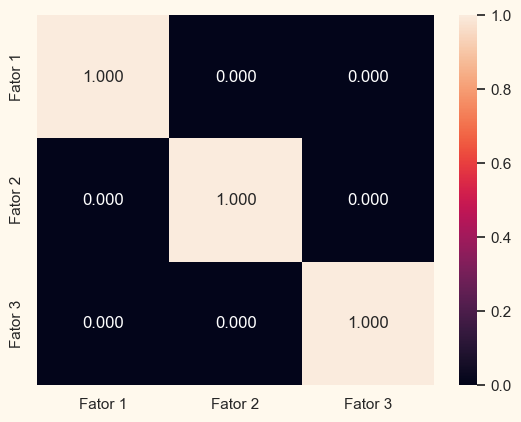

In [29]:
# Os fatores devem ser ortogonais entre si
sns.heatmap(fatores.corr(), annot=True, fmt='.3f')

#### Identificando os scores fatoriais

In [30]:
scores = pd.DataFrame(fat.weights_)
scores.columns = [f'Fator {i+1}' for i, v in enumerate(scores.columns)]
scores.index = df_pca_std.columns
print(scores)

                     Fator 1   Fator 2   Fator 3
longitude           0.038504 -0.507678 -0.053772
latitude           -0.037141  0.508215  0.011934
housing_median_age -0.110727  0.011404 -0.380398
total_rooms         0.245133  0.054360  0.089521
total_bedrooms      0.247928  0.043773 -0.113312
population          0.239056  0.019137 -0.112429
households          0.248995  0.046256 -0.105786
median_income       0.022960 -0.025434  0.860555


#### Analisando os scores fatoriais de cada fator extraído

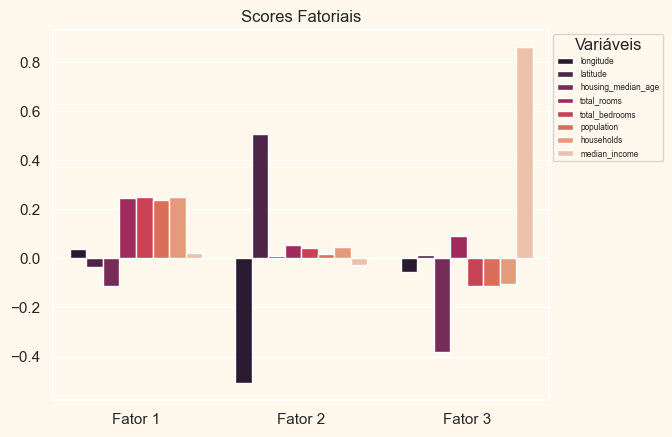

In [31]:
tabela_score_graph = scores.reset_index()
tabela_score_graph = tabela_score_graph.melt(id_vars='index')

sns.barplot(data=tabela_score_graph, x='variable', y='value', hue='index', palette='rocket')
plt.legend(title='Variáveis', bbox_to_anchor=(1,1), fontsize = '6')
plt.title('Scores Fatoriais', fontsize='12')
plt.xlabel(xlabel=None)
plt.ylabel(ylabel=None)
plt.show()

# CLUSTERING

#### Definindo o modelo

In [32]:
df_km = df_pca[['Fator 1', 'Fator 2', 'Fator 3']]

In [33]:
kmeans = KMeans(n_clusters=5, random_state=30)
kmeans.fit(df_km)
kmeans.labels_

array([4, 4, 4, ..., 1, 1, 1])

#### Método Ewbol

In [34]:
score_ = []
range_ = range(2, 8)

for i in range_:
    kmeans = KMeans(n_clusters=i, random_state=30)
    kmeans.fit(df_km)
    score_.append(silhouette_score(df_km, kmeans.labels_))

Text(0, 0.5, 'Score')

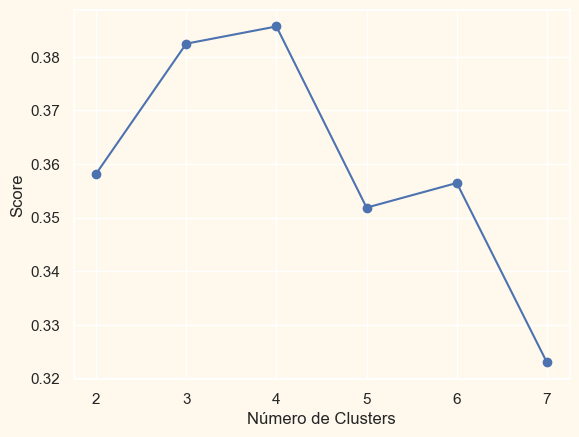

In [35]:
plt.plot(range_, score_, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Score')

#### Refazendo o modelob

In [36]:
kmeans = KMeans(n_clusters=4, random_state=30).fit(df_km)
clusters = kmeans.labels_
clusters = pd.DataFrame(clusters)
clusters.columns = ['clusters'] 

#### Agregando os clusters no df

In [37]:
df_km = pd.concat([df_km, clusters], axis=1)

#### Visualizando os clusters

<AxesSubplot:xlabel='Fator 2', ylabel='Fator 3'>

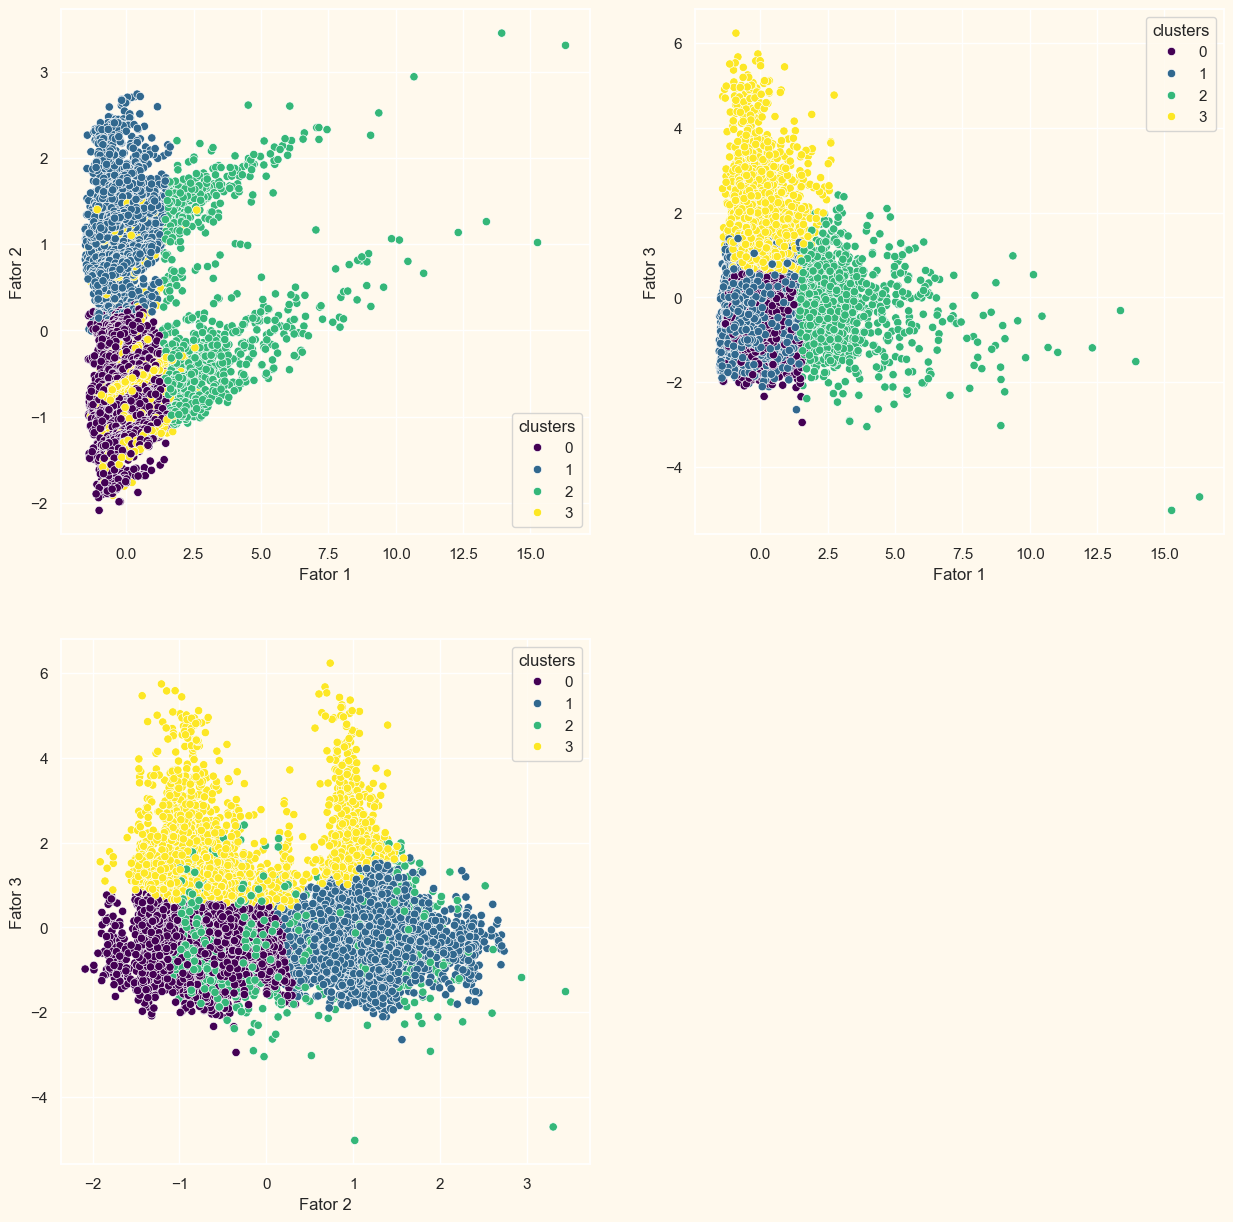

In [38]:
plt.figure(figsize=(15,15))

plt.subplot(2, 2, 1)
sns.scatterplot(x='Fator 1', y='Fator 2', hue='clusters', data=df_km, palette='viridis')

plt.subplot(2, 2, 2)
sns.scatterplot(x='Fator 1', y='Fator 3', hue='clusters', data=df_km, palette='viridis')

plt.subplot(2, 2, 3)
sns.scatterplot(x='Fator 2', y='Fator 3', hue='clusters', data=df_km, palette='viridis')

# REGRESSÃO LINEAR (OLM)

## OLM - Fatores extraídos PCA

#### Duplicando o dataframe e criando variáveis dummyes

In [48]:
df_agregar = df[['median_house_value', 'ocean_proximity']]

In [49]:
df_olm = pd.concat([df_km, df_agregar], axis=1)
df_olm = pd.get_dummies(data=df_olm, columns=['ocean_proximity'], drop_first=True)

In [50]:
df_olm.columns

Index(['Fator 1', 'Fator 2', 'Fator 3', 'clusters', 'median_house_value',
       'ocean_proximity_INLAND', 'ocean_proximity_ISLAND',
       'ocean_proximity_NEAR_BAY', 'ocean_proximity_NEAR_OCEAN'],
      dtype='object')

#### Definindo o modelo

In [ ]:
reg_olm = sm.OLS.from_formula()

In [45]:
df_km

,Fator 1,Fator 2,Fator 3,clusters
0,-1.060426,1.010317,1.979521,3
1,1.490305,1.399762,2.077602,3
2,-0.997804,1.060083,1.139666,1
3,-0.972141,1.090247,0.370835,1
4,-0.900053,1.132755,-0.452559,1
...,...,...,...,...
20635,-0.530976,1.256875,-0.765241,1
20636,-0.944960,1.188074,0.030139,1
20637,-0.227428,1.310266,-0.507358,1
20638,-0.436202,1.301863,-0.405138,1
